### Importando as bibliotecas e realizando a análise exploratória
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.shape

(100000, 9)

In [5]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
data.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [10]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [12]:
data.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

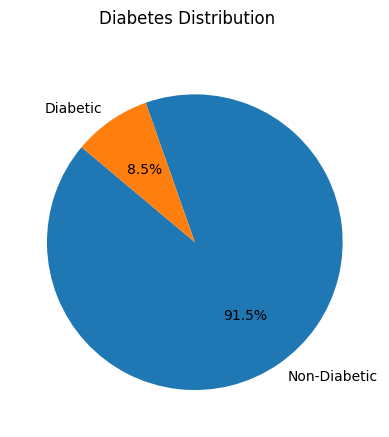

In [27]:
# Adicionar o gráfico de pizza
plt.pie(data['diabetes'].value_counts(), labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=140)
plt.suptitle('Diabetes Distribution')
plt.show()

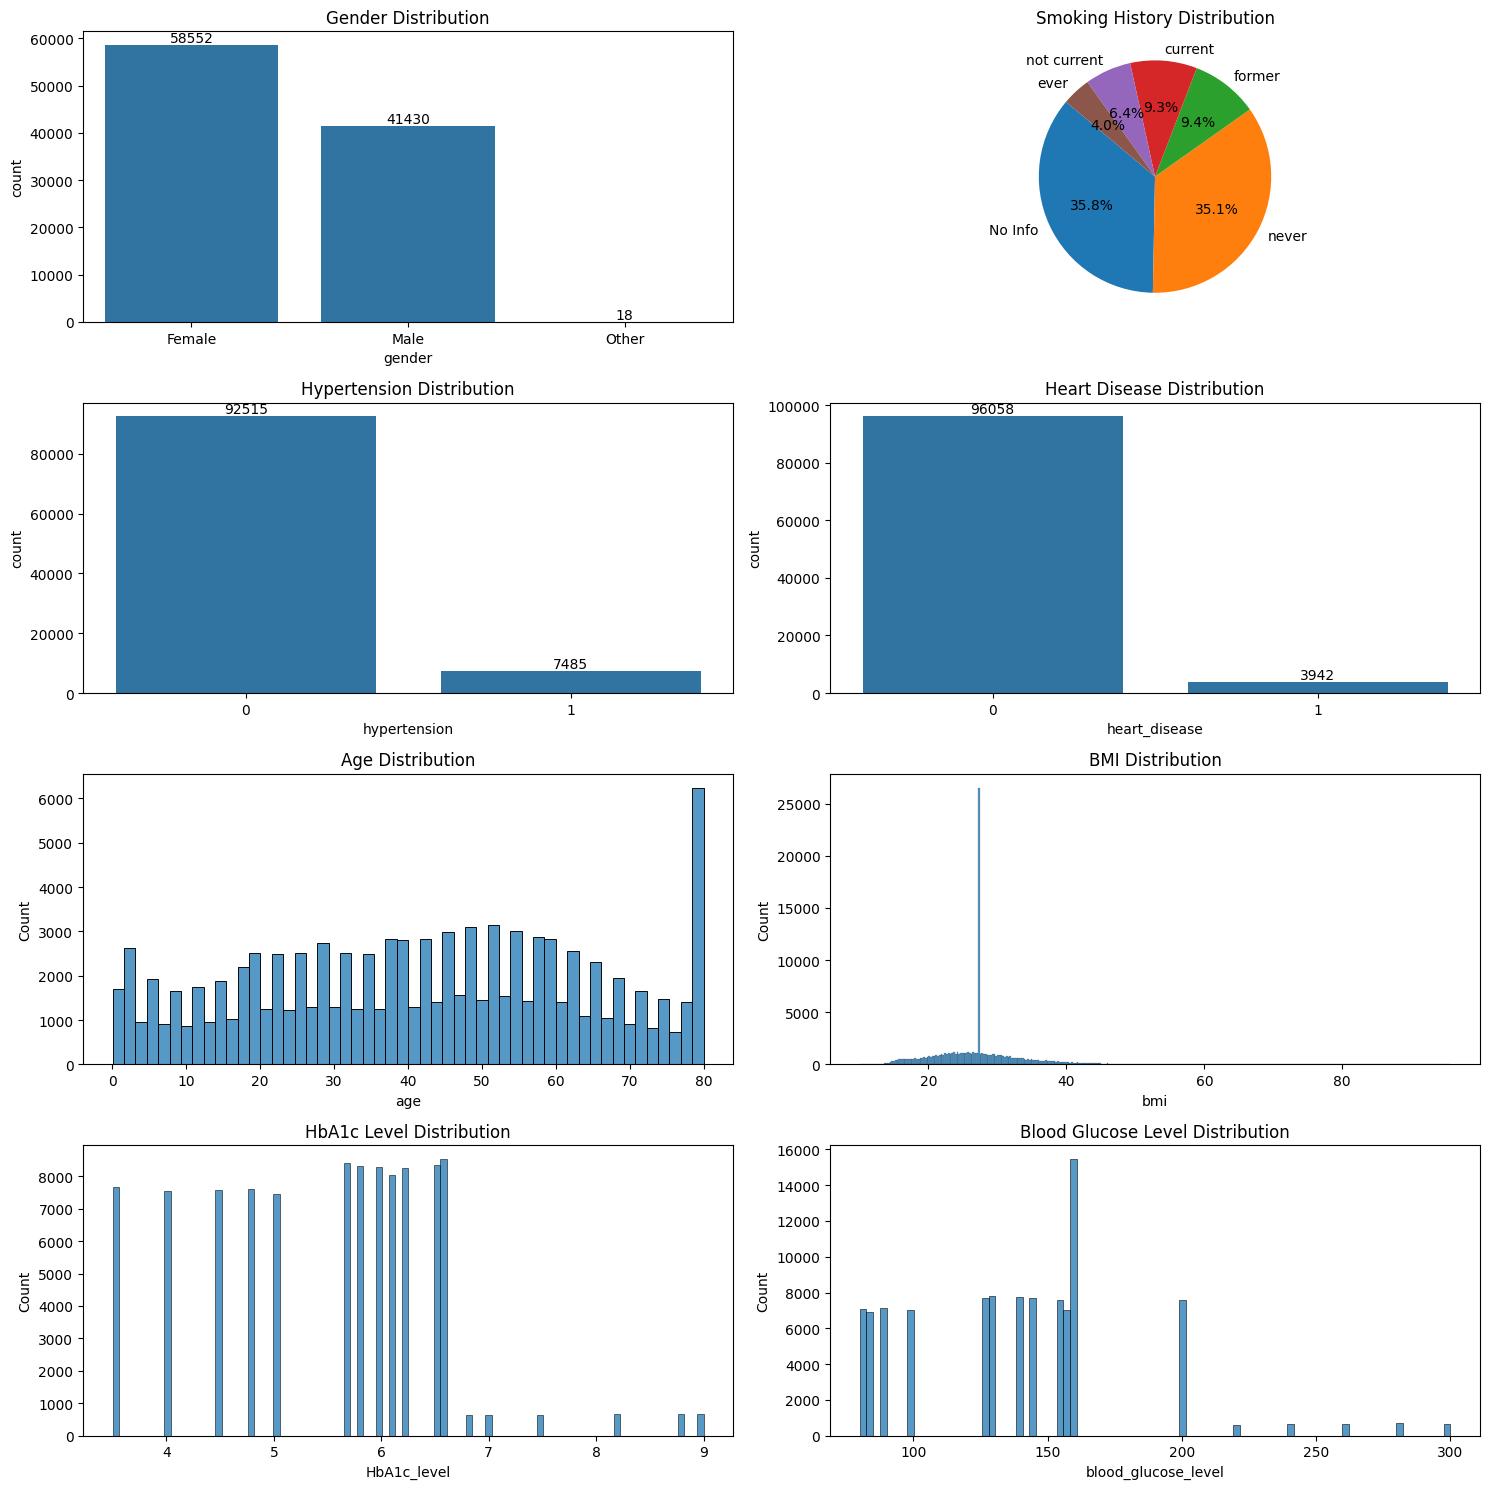

In [33]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

# Gender Distribution
sns.countplot(data=data, x="gender", ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')
for container in axs[0, 0].containers:
    axs[0, 0].bar_label(container)

# Smoking History Distribution
smk_counts = data['smoking_history'].value_counts()
axs[0, 1].pie(smk_counts, labels=smk_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Smoking History Distribution')

# Hypertension Distribution
sns.countplot(data=data, x="hypertension", ax=axs[1, 0])
axs[1, 0].set_title('Hypertension Distribution')
for container in axs[1, 0].containers:
    axs[1, 0].bar_label(container)

# Heart Disease Distribution
sns.countplot(data=data, x="heart_disease", ax=axs[1, 1])
axs[1, 1].set_title('Heart Disease Distribution')
for container in axs[1, 1].containers:
    axs[1, 1].bar_label(container)

# Age Distribution
sns.histplot(data=data, x='age', ax=axs[2, 0])
axs[2, 0].set_title('Age Distribution')

# BMI Distribution
sns.histplot(data=data, x='bmi', ax=axs[2, 1])
axs[2, 1].set_title('BMI Distribution')

# HbA1c Level Distribution
sns.histplot(data=data, x='HbA1c_level', ax=axs[3, 0])
axs[3, 0].set_title('HbA1c Level Distribution')

# Blood Glucose Level Distribution
sns.histplot(data=data, x='blood_glucose_level', ax=axs[3, 1])
axs[3, 1].set_title('Blood Glucose Level Distribution')

# Ajuste de layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

<Axes: >

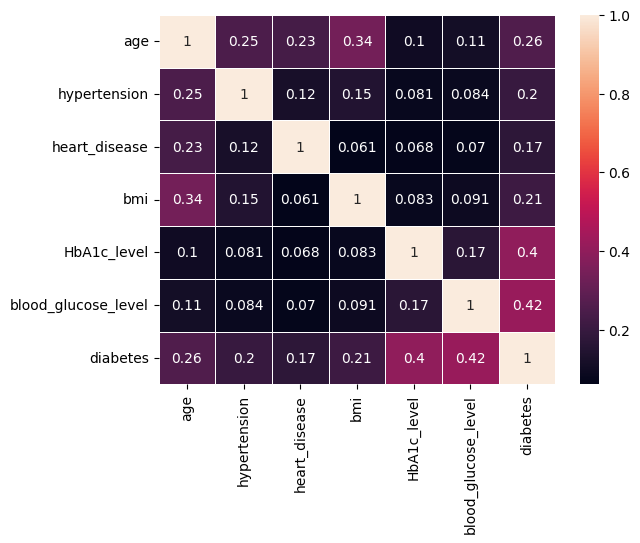

In [14]:
sns.heatmap(data.drop(['gender', 'smoking_history'], axis=1).corr(), annot=True, linewidth=0.5)